# **COVID Cases and Deaths WorldWide**


---



***TABLA DE CONTENIDOS***


1.   Resumen
2.   Abstract
3.   Introducción
4.   Objetivos
    *   General
    *   Específicos

5.   Planteamiento del Problema
    *   Problema
    *   Hipotésis
    *   Preguntas de investigación
6.   Análisis exploratorio de datos
    *   Librerías y carga de datos
    *   Exploración de datos
    *   Visualización de datos
7.   Limpieza de datos
8.   Procesamiento de datos con Python
    *   Descripción de datos
    *   Estimados de Locación y Variabilidad
    *   Introducción a la Visualización de Datos
    *   Exploración de Variables Categóricas y Análisis Multivariable
    *   Correlaciones y Regresión Linear Simple  
    *   Distribuciones Muestrales y Técnicas de Evaluación de Modelos
    *   Visualización de Datos Avanzada
    *   Pruebas A/B y Procesamiento de Lenguaje Natura
    *   Introducción a Machine Learning: Clasificación No Supervisada y Supervisada


---






# **Resumen**

> Este proyecto de investigación y análisis de datos tiene como objetivo utilizar técnicas de ciencia de datos y machine learning para analizar un conjunto de datos global sobre casos de COVID-19. Se explorarán diversas variables, como el número total de casos, muertes, recuperaciones, pruebas realizadas y población, con el fin de comprender mejor la dinámica de la pandemia y desarrollar modelos predictivos.



# **Abstract**

> Este proyecto utiliza técnicas de ciencia de datos y machine learning para analizar la propagación del COVID-19 a nivel mundial. Se exploran datos sobre casos confirmados, muertes, recuperaciones, pruebas realizadas y población en diferentes países. El objetivo es comprender los patrones de propagación, identificar factores asociados con una mayor incidencia y desarrollar modelos predictivos para predecir la evolución futura de la enfermedad.



**Palabras Clave:** COVID-19, ciencia de datos, machine learning, propagación, predicción.



# **Objetivos**


*   **General**


>  ̶ El objetivo general de este proyecto es utilizar técnicas de análisis de datos y machine learning para comprender la dinámica de la propagación del COVID-19 a nivel mundial, desarrollar modelos predictivos y evaluar su eficacia en la predicción de tendencias futuras de la enfermedad.


*   **Específicos**


>  ̶ Realizar un análisis detallado de los datos de COVID-19 a nivel mundial para entender su distribución y variabilidad.

>  ̶ Identificar correlaciones entre variables epidemiológicas y socioeconómicas para determinar factores de riesgo asociados con la incidencia y mortalidad por COVID-19.

>  ̶ Desarrollar modelos predictivos utilizando técnicas de machine learning y datos históricos de COVID-19.

>  ̶ Evaluar la precisión y utilidad de los modelos predictivos en la predicción de tendencias futuras de la enfermedad y su impacto en la toma de decisiones de salud pública.







# **Planteamiento del Problema**


*   **Problemática**

> La pandemia de COVID-19 ha tenido un impacto global significativo, con una amplia variabilidad en la propagación y el manejo de la enfermedad en diferentes países. Es crucial comprender y predecir la dinámica de la enfermedad para implementar medidas eficaces de salud pública y mitigar su impacto.


*   **Hipotésis**


> El análisis de datos y el modelado predictivo pueden proporcionar información valiosa sobre la propagación del COVID-19, identificar factores asociados con una mayor incidencia y ayudar a predecir tendencias futuras.


*   **Preguntas de investigación**

 1.   ¿Cuáles son los patrones de propagación del COVID-19 en diferentes países?
 2.   ¿Qué factores están asociados con una mayor incidencia y mortalidad de COVID-19?
 3.   ¿Podemos predecir la propagación futura del COVID-19 utilizando técnicas de aprendizaje automático?






# **ANÁLISIS EXPLORATORIO DE DATOS**



### ***Librerías y carga de datos***




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Tecnolochicas_BEDU/PROYECTO/covid_worldwide.csv', index_col=0)
df

### ***Exploración de datos***

In [ ]:
df.info()
df.shape

In [ ]:
df.describe()

In [ ]:
# Conteo de valores nulos del datset
df.isna().sum()

In [ ]:
#  Evalúa si hay datos duplicados en el DataFrame.
#   True:hay al menos una fila duplicada; False: no hay duplicados en el DataFrame.
df.duplicated().any()

### ***Visualización de datos***

In [ ]:
# Países con el mayor número de casos totales de COVID-19
paises_top_4 = df.head(4)

sns.set_style("darkgrid")
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# Iterar sobre los subplots y los países para graficar
for i, (index, pais) in enumerate(paises_top_4.iterrows()):
    # Extraer los datos del país actual
    poblacion = pais['Population']
    total_casos = pais['Total Cases']
    total_muertes = pais['Total Deaths']
    total_activos = pais['Active Cases']

    ax = axes[i]
    sns.barplot(x=['Población', 'Total Casos', 'Total Muertes', 'Total Activos'],
                y=[poblacion, total_casos, total_muertes, total_activos],
                palette='mako', ax=ax)

    ax.set_title(pais['Country'])
    ax.set_ylabel('Cantidad')

fig.suptitle('Cuatro países con mayor número de muertes por casos de COVID-19', fontsize=30)
plt.tight_layout()
plt.show()

# **LIMPIEZA DE DATOS**

In [ ]:
#   -how='any': se eliminarán las filas si contienen al menos un valor nulo en alguna de sus columnas.
#   -inplace=True: modifica el DataFrame original sin necesidad de asignarlo a una nueva variable.
df.dropna(how='any',inplace=True)
df.isna().sum()

Country            0
Total Cases        0
Total Deaths       0
Total Recovered    0
Active Cases       0
Total Test         0
Population         0
dtype: int64

In [ ]:
#   -drop=True: elimina la columna antigua del índice.
#   -inplace=True: modifica el DataFrame original sin necesidad de asignarlo a una nueva variable.
df.reset_index(drop=True, inplace=True)
df.head()

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"


In [ ]:
# Lista de columnas en las que se eliminarán las comas y se convertirán a enteros
columns = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Test', 'Population']

# Aplicar una función lambda a cada celda de las columnas especificadas
#   - x.str.replace(',', ''): elimina las comas de cada celda en las columnas seleccionadas.
#   -.astype('int'): Convierte las celdas resultantes a números enteros (int).
df[columns] = df[columns].apply(lambda x: x.str.replace(',', '').astype('int'))

In [ ]:
# Una buena práctica en columnas es mantener snake_case, se procede a cambiar los nombres de las columnas
rename_columns = {'Country' : 'country',
                  'Total Cases' : 'total_cases',
                  'Total Deaths' : 'total_deaths',
                  'Total Recovered' : 'total_recovered',
                  'Active Cases' : 'active_cases',
                  'Total Test' : 'total_test',
                  'Population' : 'population'}

# Renombramos las columnas con los valores del diccionario
df_renamed = df.rename(columns=rename_columns)
df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          195 non-null    object
 1   total_cases      195 non-null    int64 
 2   total_deaths     195 non-null    int64 
 3   total_recovered  195 non-null    int64 
 4   active_cases     195 non-null    int64 
 5   total_test       195 non-null    int64 
 6   population       195 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 10.8+ KB


In [ ]:
df = df_renamed
df

,country,total_cases,total_deaths,total_recovered,active_cases,total_test,population,proporcion_casos_prueba
0,USA,104196861,1132935,101322779,1741147,1159832679,334805269,0.089838
1,India,44682784,530740,44150289,1755,915265788,1406631776,0.048819
2,France,39524311,164233,39264546,95532,271490188,65584518,0.145583
3,Germany,37779833,165711,37398100,216022,122332384,83883596,0.308829
4,Brazil,36824580,697074,35919372,208134,63776166,215353593,0.577403
...,...,...,...,...,...,...,...,...
190,Anguilla,3904,12,3879,13,51382,15230,0.075980
191,Macao,3488,120,3357,11,7850,667490,0.444331
192,Saint Pierre Miquelon,3452,2,2449,1001,25400,5759,0.135906
193,Wallis and Futuna,3427,7,438,2982,20508,10982,0.167106


In [ ]:
df = df_renamed

# **PROCESAMIENTO DE DATOS CON PYTHON**

###**Descripción de datos**


**country:** Nombre del país

**total_cases:** Total de casos

**total_deaths:** Total de muertes

**total_recovered:** Total de personas recuperadas

**active_cases:** Total de casos activos

**total_test:** Total de pruebas COVID realizadas

**population:** Población

### ¿Cuántas personas muerieron en el mundo?



In [ ]:
# ¿Cuál es el total de personas que muerieron en el mundo a causa de COVID19?
muertes_total = df['total_deaths'].sum()
print(f'A causa de COVID19 murieron en el mundo {muertes_total:,.0f} personas.')

A causa de COVID19 murieron en el mundo 6,588,473 personas.


### ¿Cuál es el promedio de pruebas realizadas en el mundo?

In [ ]:
# ¿Cuál es el promedio de pruebas realizadas en el mundo?
trimmed_mean_test = stats.trim_mean(df['total_test'],0.1)
print(f'En el mundo se hicieron en promedio {trimmed_mean_test:,.0f} pruebas COVID19.')

En el mundo se hicieron en promedio 8,646,654 pruebas COVID19.


<ipython-input-98-d2cf6f138d96>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promedio_muertes.values, y=promedio_muertes.index, palette="viridis")


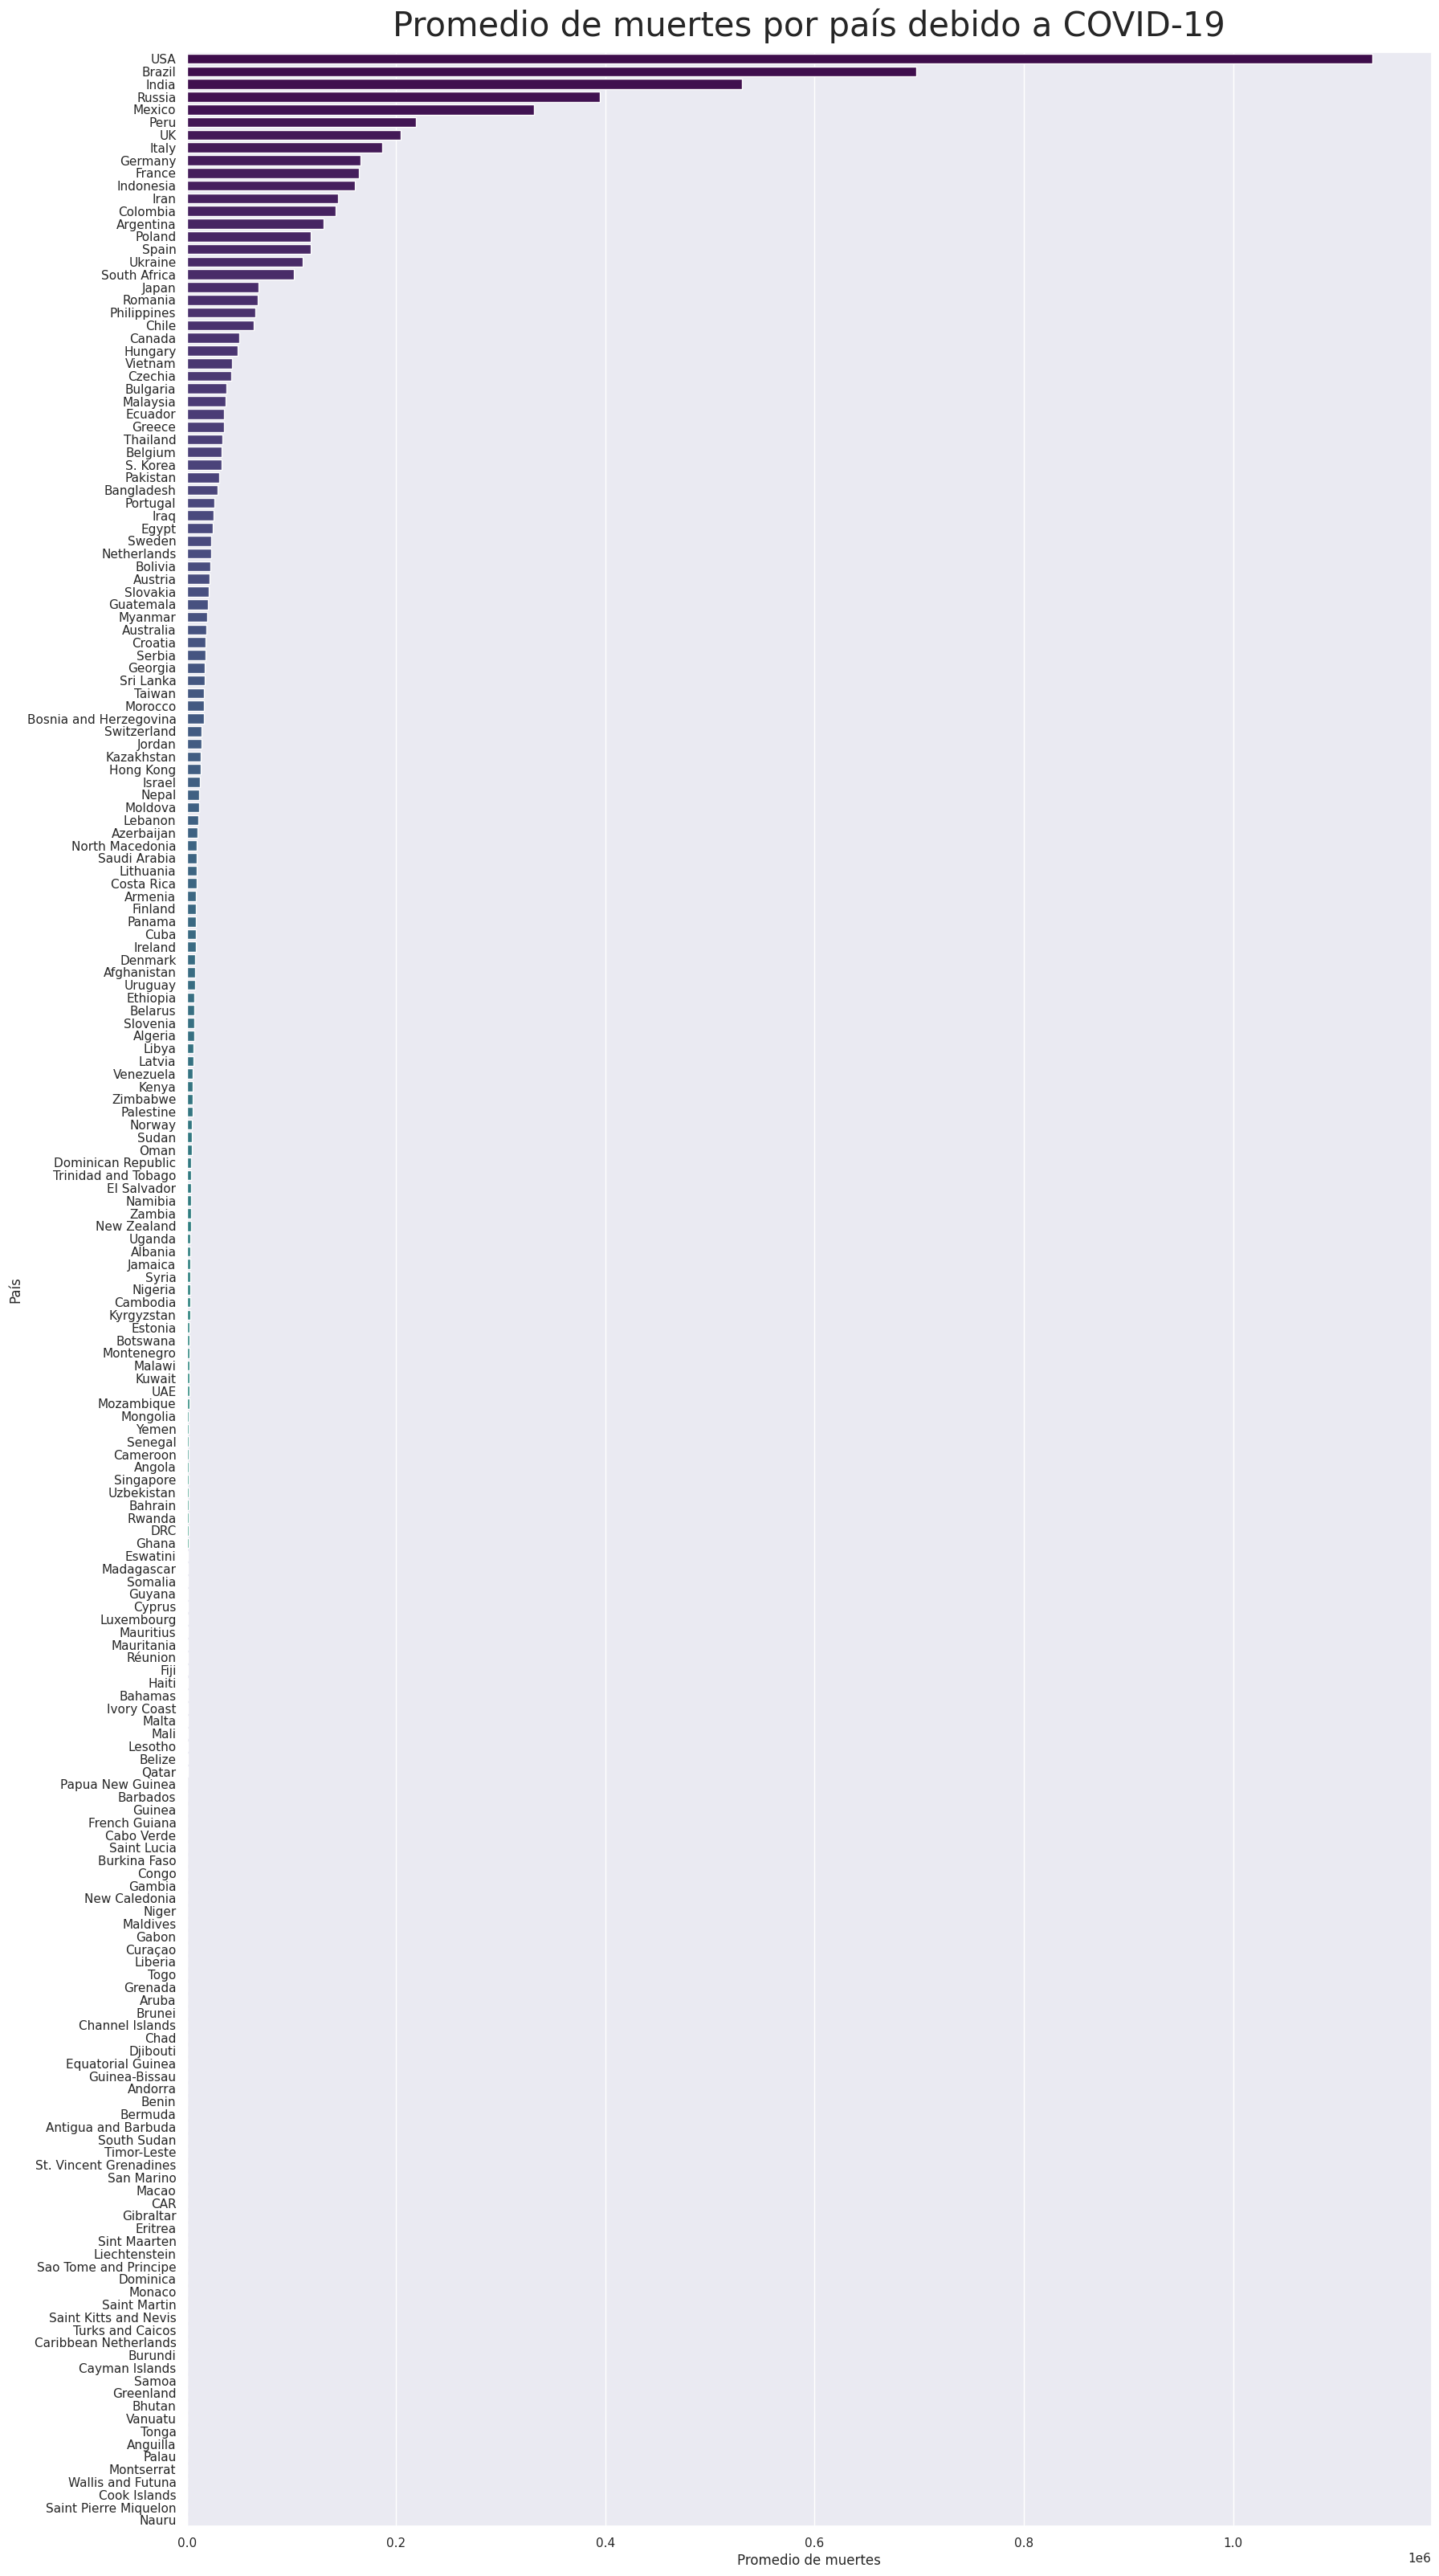

In [ ]:
# Agrupamos el DataFrame por país y calculamos el promedio de muertes en cada país, luego ordenamos de mayor a menor
promedio_muertes = df.groupby('country')['total_deaths'].mean().sort_values(ascending=False)

# Configurar el estilo y tamaño del gráfico
sns.set_style("darkgrid")
plt.figure(figsize=(20, 40))

# Crear un gráfico de barras utilizando Seaborn
sns.barplot(x=promedio_muertes.values, y=promedio_muertes.index, palette="viridis")

# Configurar título y etiquetas
plt.title('Promedio de muertes por país debido a COVID-19', fontsize=30, pad=15)
plt.xlabel('Promedio de muertes')
plt.ylabel('País')

# Mostrar el gráfico
plt.show()


Promedio de muertes en el mundo y por pais

preomedio de casos covi18 en el mundo y por pais

### ***S1. Estimados de Locación y Variabilidad***

Utilizar estadísticas descriptivas como media, mediana y desviación estándar para resumir la distribución de casos y variables relacionadas.

### ***S2. Introducción a la Visualización de Datos***

Emplear gráficos de barras, histogramas y diagramas de dispersión para visualizar la distribución de casos, tasas de mortalidad y pruebas realizadas.

### ***S3. Exploración de Variables Categóricas y Análisis Multivariable***

Analizar la relación entre variables categóricas como la región geográfica y la incidencia de COVID-19 utilizando tablas de contingencia y pruebas estadísticas.

**1. Tablas de contingencia:**

> Utilizamos las tablas de contingencia para examinar la relación entre dos variables categóricas. En este caso, entre países y diferentes métricas de COVID-19 como lo es el total de casos en el país y las muertes que hubo, con el objetivo de observar cómo varían los valores entre los países.





In [ ]:
# Tabla de contingencia entre país y total de casos
tabla_contingencia = df.groupby('country')[['total_cases', 'total_deaths']].sum()
print(tabla_contingencia)

# Calcular el porcentaje de muertes respecto al total de casos
tabla_contingencia['porcentaje_muertes'] = (tabla_contingencia['total_deaths'] / tabla_contingencia['total_cases']) * 100

# Filtrar el porcentaje de muertes de cada países con respecto al total de casos
tabla_contingencia_ordenada = tabla_contingencia.sort_values(by='porcentaje_muertes', ascending=False)

# Obtener el país con el mayor porcentaje de muertes
pais_mayor_porcentaje_muertes = tabla_contingencia_ordenada.index[0]

print(f"----- El país con el mayor porcentaje de muertes es {pais_mayor_porcentaje_muertes} con un {tabla_contingencia_ordenada['porcentaje_muertes'][0]:.2f}% de muertes respecto al total de casos.-----")


                   total_cases  total_deaths
country                                     
Afghanistan             208545          7882
Albania                 334167          3595
Algeria                 271378          6881
Andorra                  47839           165
Angola                  105184          1931
...                        ...           ...
Vietnam               11526508         43186
Wallis and Futuna         3427             7
Yemen                    11945          2159
Zambia                  340763          4047
Zimbabwe                261606          5652

[195 rows x 2 columns]
----- El país con el mayor porcentaje de muertes es Yemen con un 18.07% de muertes respecto al total de casos.-----



> El análisis de la tabla de contingencia revela una relación significativa entre los países y el impacto del COVID-19 en términos de casos y muertes. Al examinar el país con el mayor porcentaje de muertes respecto al total de casos, se identifica un punto crítico en la gestión de la pandemia. Este país enfrenta desafíos considerables en la contención y tratamiento del virus, lo que sugiere una necesidad urgente de intervenciones y recursos adicionales para mitigar la propagación del virus y reducir la carga sobre el sistema de salud.



**2. Análisis de distribución con displot:**

> Utilizamos displot de Seaborn para visualizar la distribución de pruebas realizadas, de modo que podemos observar cómo se distribuyen en cada país en cuanto a densidad.

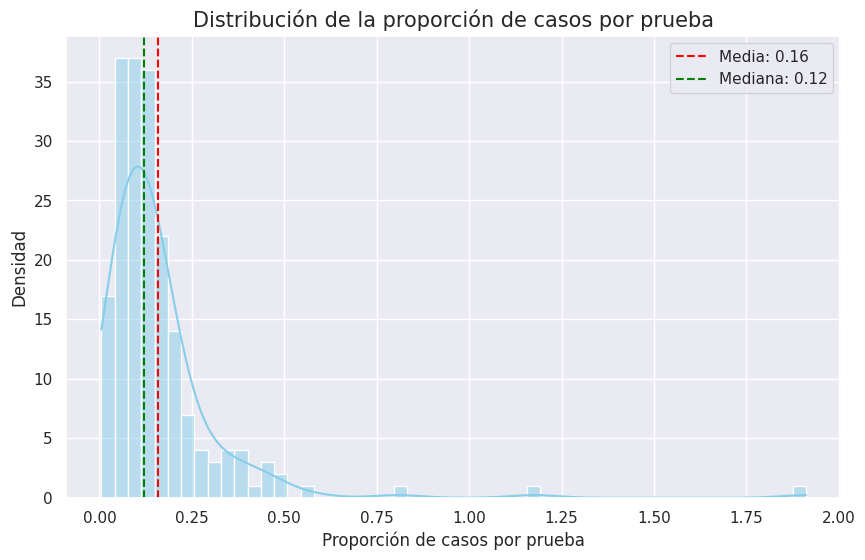

In [ ]:
# Calcular la proporción de casos por prueba para cada país
df['proporcion_casos_prueba'] = df['total_cases'] / df['total_test']

# Graficar la distribución de la proporción de casos por prueba
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='proporcion_casos_prueba', kde=True, color='skyblue')
plt.title('Distribución de la proporción de casos por prueba', fontsize=15)
plt.xlabel('Proporción de casos por prueba')
plt.ylabel('Densidad')

# Calcular estadísticas descriptivas
mean_proporcion = df['proporcion_casos_prueba'].mean()
median_proporcion = df['proporcion_casos_prueba'].median()

# Mostrar estadísticas descriptivas
plt.axvline(mean_proporcion, color='red', linestyle='--', label=f'Media: {mean_proporcion:.2f}')
plt.axvline(median_proporcion, color='green', linestyle='--', label=f'Mediana: {median_proporcion:.2f}')
plt.legend()

plt.show()

> El eje x representa la proporción de casos por prueba, lo que significa la cantidad de casos positivos de COVID-19 detectados por cada prueba realizada.

> Por otro lado, la densidad en el eje y indica la frecuencia relativa de las proporciones de casos por prueba en el conjunto de datos.

> La distribución al estar sesgada hacia la izquierda, indica que la mayoría de los países presentan una proporción baja de casos positivos en relación con el número de pruebas realizadas. Esto sugiere que estos países están llevando a cabo pruebas de detección de manera eficaz y que la mayoría de los resultados son negativos para COVID-19.

> La línea roja punteada indica la media de la proporción de casos por prueba en todos los países, mientras que la línea verde punteada indica la mediana.
Comparar la media y la mediana nos puede dar una idea de la centralidad de la distribución y si hay valores atípicos que afecten la media.

In [ ]:
resumen_pais = df.groupby('country').agg({
    'total_cases': 'mean',
    'total_deaths': 'mean',
    'total_test': 'mean'
})
print(resumen_pais)

                   total_cases  total_deaths  total_test
country                                                 
Afghanistan           208545.0        7882.0   1188898.0
Albania               334167.0        3595.0   1941032.0
Algeria               271378.0        6881.0    230861.0
Andorra                47839.0         165.0    249838.0
Angola                105184.0        1931.0   1499795.0
...                        ...           ...         ...
Vietnam             11526508.0       43186.0  85826548.0
Wallis and Futuna       3427.0           7.0     20508.0
Yemen                  11945.0        2159.0    329592.0
Zambia                340763.0        4047.0   3865993.0
Zimbabwe              261606.0        5652.0   2525756.0

[195 rows x 3 columns]


### ***S4. Correlaciones y Regresión Linear Simple***

Evaluar la correlación entre variables como la densidad de población, el acceso a la atención médica y la incidencia de COVID-19. Aplicar regresión lineal para modelar estas relaciones.

**1. Matriz de Correlaciones:**



> Calculamos el coeficiente de correlación de Pearson para evaluar la relación lineal entre las variables disponibles, como la densidad de población, el acceso a la atención médica y la incidencia de COVID-19.



<ipython-input-122-2c67c0f60e19>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


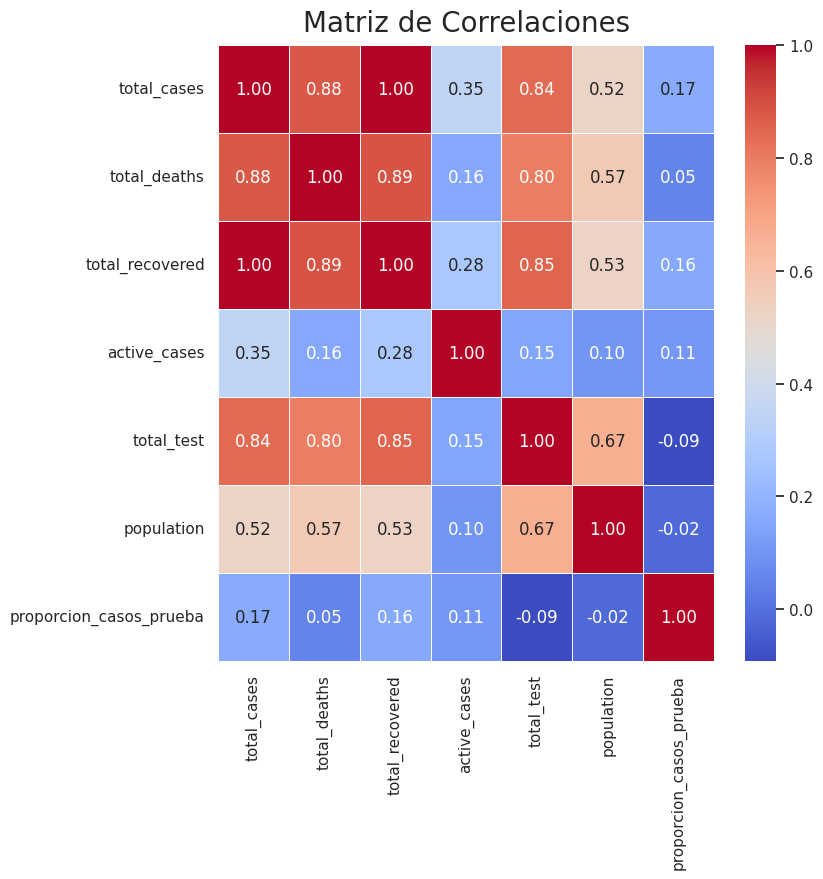

In [ ]:
# Coeficiente de correlación de Pearson
correlation_matrix = df.corr()

# Matriz de correlaciones con un mapa de calor
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlaciones', fontsize=20, pad=10)
plt.show()

**2. Gráficos de dispersión: **



> El gráfico de dispersión de pares nos proporciona una visualización completa de las relaciones entre variables en un dataset de COVID-19, lo que nos permite identificar patrones, tendencias y posibles asociaciones que pueden ser relevantes para comprender la dinámica de la pandemia, lo cual nos es útil para el procesamiento de regresion linear.



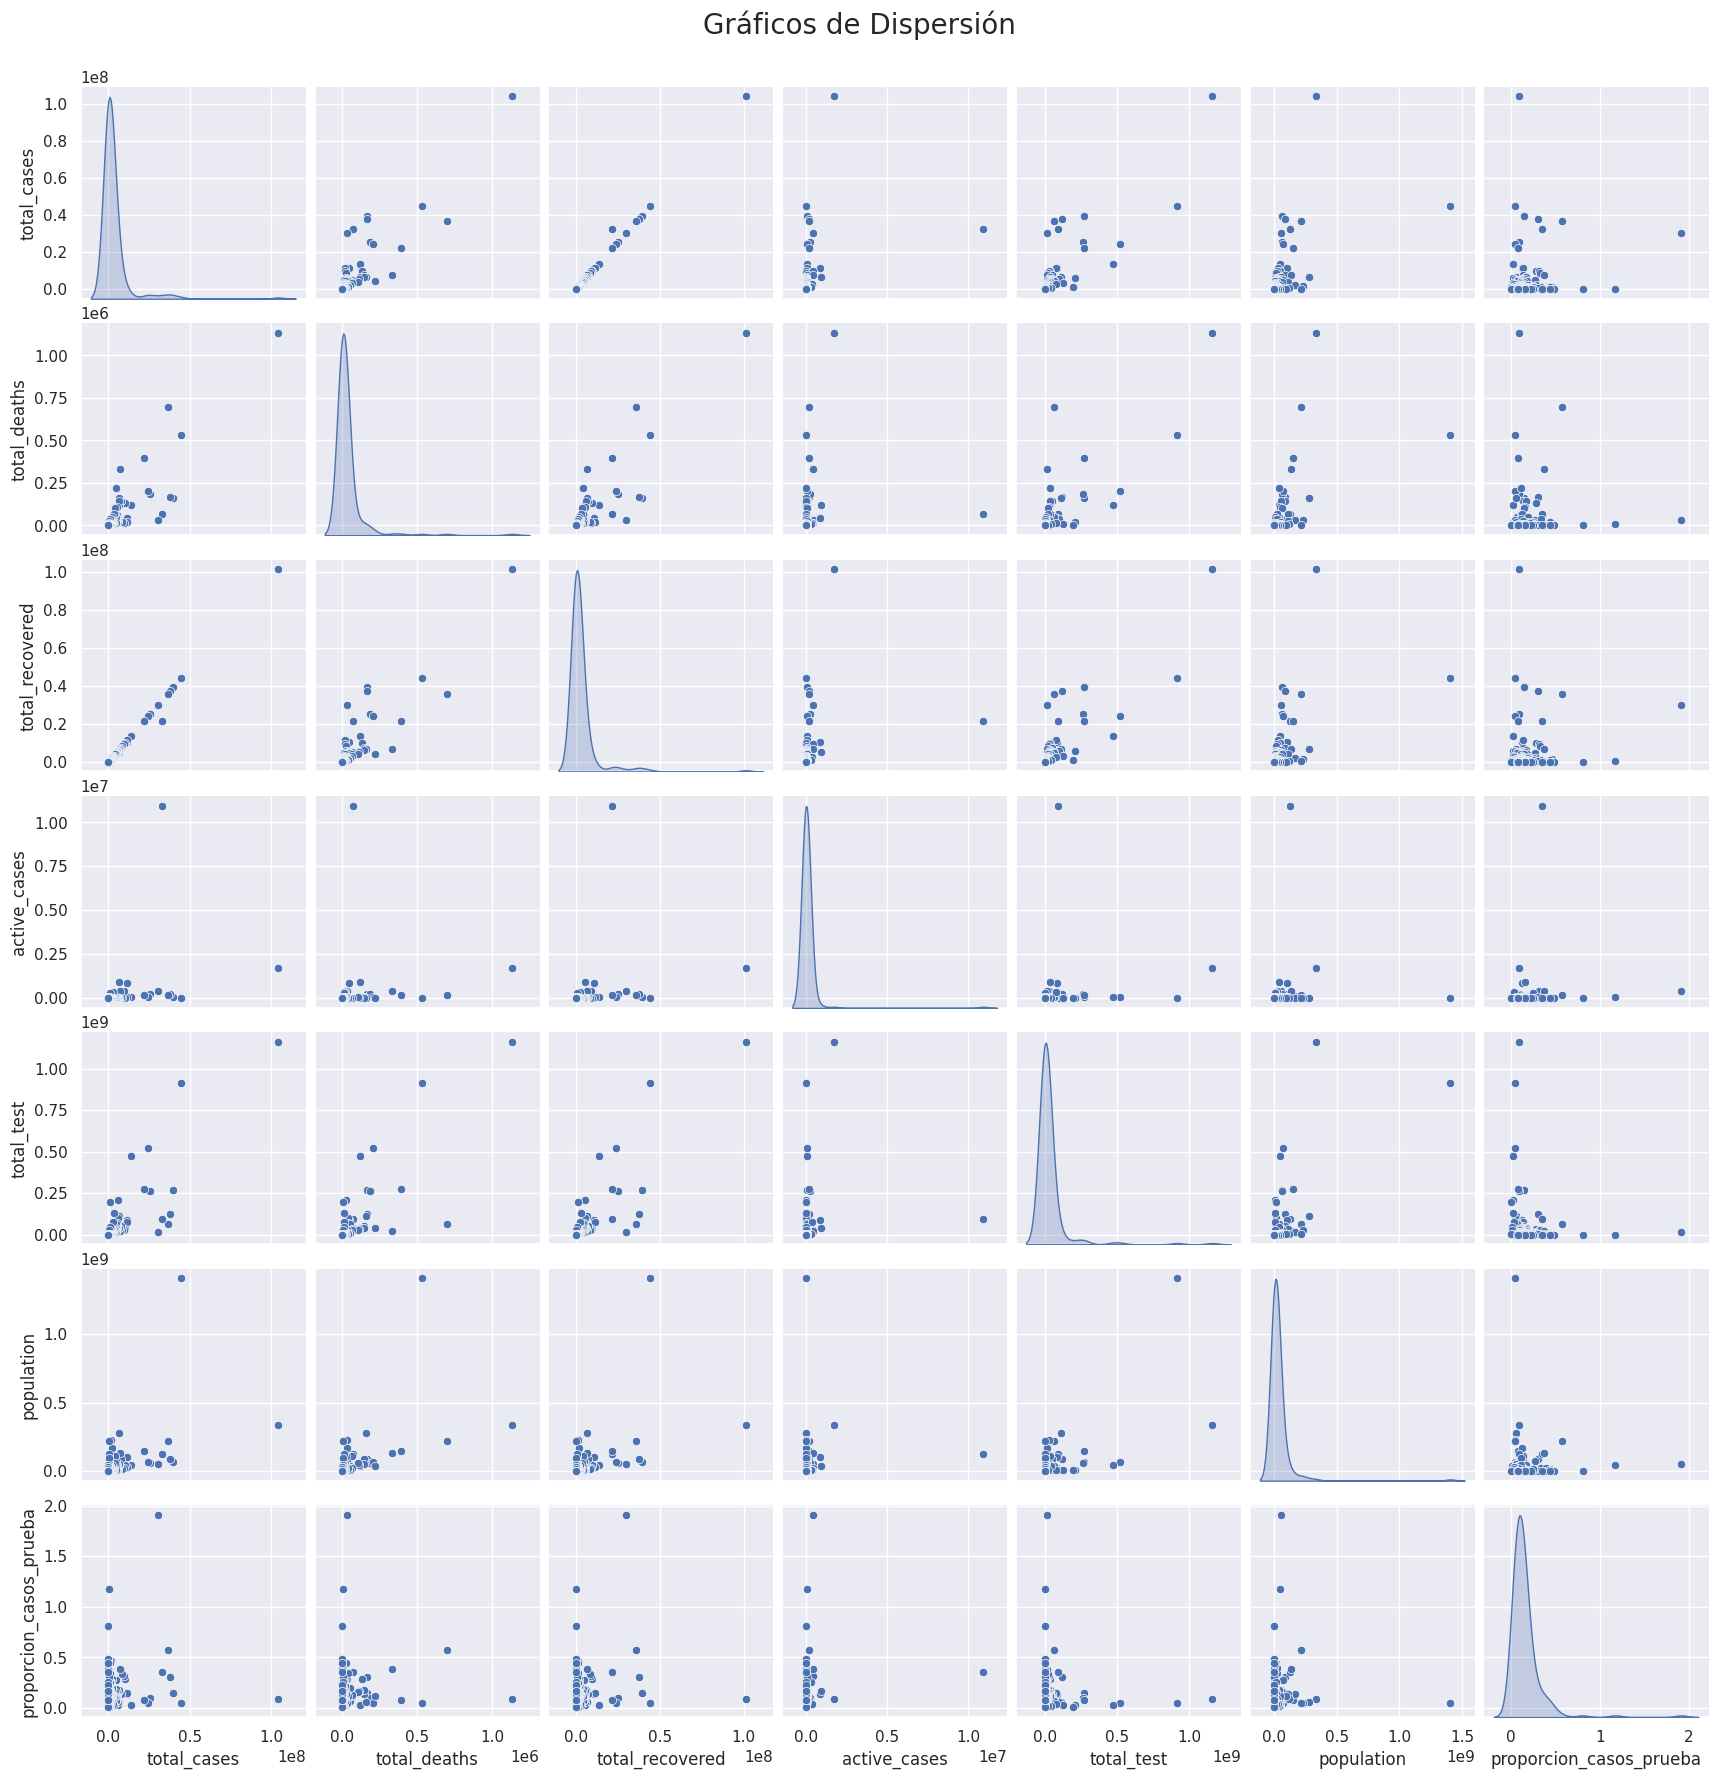

In [ ]:
# Gráficos de dispersión de pares de variables
sns.set(style="darkgrid")

grafico_dispersión = sns.pairplot(df, diag_kind='kde')
grafico_dispersión.fig.suptitle('Gráficos de Dispersión', fontsize=20, y=1.02)

plt.show()

**3. Regresión Linear de dos variables:**



> Aplicamos la regresión lineal simple para modelar la relación entre dos variables, como la incidencia de COVID-19 y la densidad de población o el acceso a la atención médica.



> El análisis de regresión lineal simple entre la población y el total de casos de COVID-19 proporciona una comprensión de cómo el tamaño de la población puede influir en la propagación del virus. En este caso, un ***coeficiente de pendiente de 0.05*** sugiere que, en promedio, por cada aumento de una unidad en la población, se espera un aumento de 0.05 unidades en el total de casos de COVID-19.





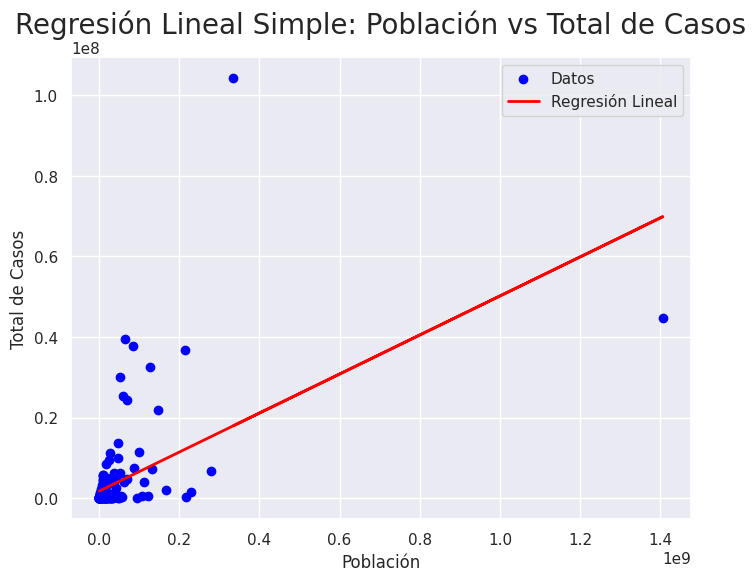

Coeficiente de pendiente (b): 0.05
Intersección (a): 1776797.02


In [ ]:
# Regresión lineal simple
X = df['population'].values.reshape(-1, 1)  # Variable independiente (población)
y = df['total_cases'].values  # Variable dependiente (total de casos)

# Creamos el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Grafico
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Datos')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regresión Lineal')
plt.xlabel('Población')
plt.ylabel('Total de Casos')
plt.title('Regresión Lineal Simple: Población vs Total de Casos', fontsize=20)
plt.legend()
plt.show()

# Coeficientes de la regresión lineal
print(f'Coeficiente de pendiente (b): {model.coef_[0]:.2f}')
print(f'Intersección (a): {model.intercept_:.2f}')


**4. Regresión Linear con varias variables:**



> Las variables elegidas, como el total de muertes, el total de pruebas y la población, son indicadores importantes que podrían estar asociados con la propagación del virus.



> El ajuste del modelo a los datos de entrenamiento y la predicción de los valores de prueba nos permiten evaluar la capacidad del modelo para generalizar y predecir el número total de casos en nuevos conjuntos de datos.





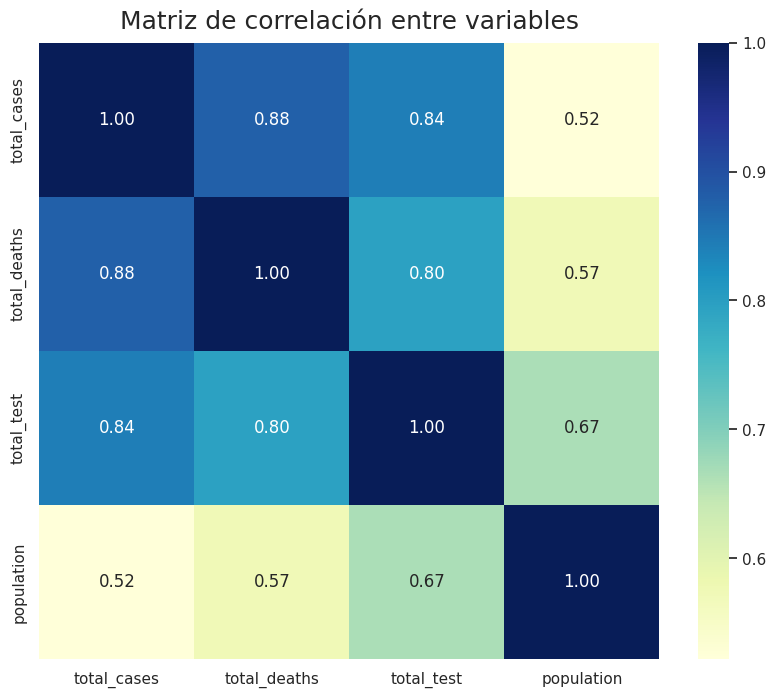

In [ ]:
# Seleccionar variables relevantes
datos = df[['total_cases', 'total_deaths', 'total_test', 'population']]

# Paso 2: Evaluación de correlación
# Calcular la matriz de correlación
correlacion = datos.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='YlGnBu', fmt=".2f", annot_kws={"size": 12})
plt.title('Matriz de correlación entre variables', fontsize=18, pad=10)
plt.show()

# Paso 3: Aplicar regresión lineal
# Dividir los datos en conjuntos de entrenamiento y prueba
X = datos[['total_deaths', 'total_test', 'population']]
y = datos['total_cases']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
modelo.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred = modelo.predict(X_test)


> La matriz de correlación muestra que el total de casos está correlacionado positivamente con el total de muertes y el total de pruebas realizadas, lo que indica que a medida que aumentan estas variables, también lo hace el total de casos.

> La correlación entre el total de casos y la población es menos evidente, lo que sugiere que la población no es el único factor determinante en la propagación del virus.

> Se plantea que este modelo pueda predecir el total de casos utilizando las variables de muertes totales, pruebas totales y población. Las predicciones se compararán con los valores reales de los datos de prueba para evaluar la precisión del modelo.

### ***S5. Distribuciones Muestrales y Técnicas de Evaluación de Modelos***

Utilizar técnicas de validación cruzada y bootstrap para evaluar la precisión y robustez de los modelos predictivos.

### ***S6. Visualización de Datos Avanzada***

Emplear gráficos de series temporales, mapas de calor y diagramas de correlación avanzados para visualizar patrones y relaciones complejas en los datos.

### ***S7. Pruebas A/B y Procesamiento de Lenguaje Natural***



### ***S8. Introducción a Machine Learning: Clasificación No Supervisada y Supervisada***
